In [144]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.optimize import curve_fit
from itertools import cycle
from scipy.stats import norm

#plt.style.use("ggplot")
#color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
#color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

## 正規分布

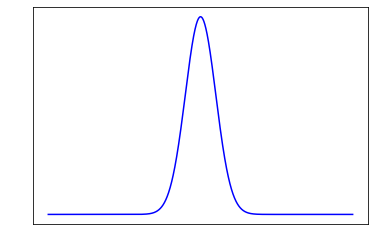

In [158]:
fig  = plt.figure(figsize=(6, 4))
x = np.arange(-10,10,0.01)
#ガウス分布の確率密度関数,平均 0、標準偏差1
y = norm.pdf(x,0,1)
 
plt.plot(x,y,color='blue')
plt.xticks(color="None")
plt.yticks(color="None")
plt.tick_params(length=0)
plt.show()
#plt.xlim(-10,10)

## 相転移

In [11]:
data_10 = np.loadtxt('../output/phase_transfer_L10_2025.dat')
data_20 = np.loadtxt('../output/phase_transfer_L20_2025.dat')
data_30 = np.loadtxt('../output/phase_transfer_L30_2025.dat')
data_40 = np.loadtxt('../output/phase_transfer_L40_2025.dat')
data_50 = np.loadtxt('../output/phase_transfer_L50_2025.dat')

In [12]:
mag_10 = data_10[:,0]
mag_20 = data_20[:,0]
mag_30 = data_30[:,0]
mag_40 = data_40[:,0]
mag_50 = data_50[:,0]
T_10 = data_10[:, 1]
T_20 = data_20[:, 1]
T_30 = data_30[:, 1]
T_40 = data_40[:, 1]
T_50 = data_50[:, 1]

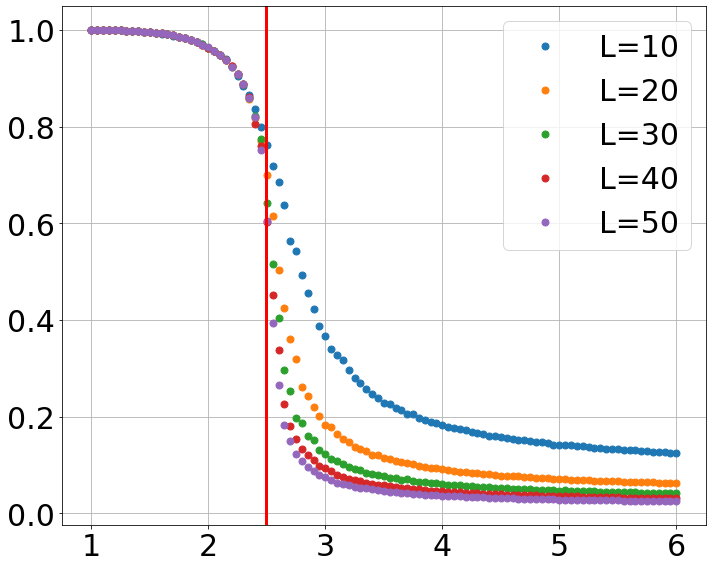

In [36]:
fig, ax = plt.subplots(figsize=(10,8))
l1, l2, l3, l4, l5 = "L=10", "L=20","L=30","L=40", "L=50" 
ax.plot(T_10, mag_10, label=l1,marker='o', markersize=7, linestyle='None')
ax.plot(T_20, mag_20, label=l2,marker='o', markersize=7, linestyle='None')
ax.plot(T_30, mag_30, label=l3,marker='o', markersize=7, linestyle='None')
ax.plot(T_40, mag_40, label=l4,marker='o', markersize=7, linestyle='None')
ax.plot(T_50, mag_50, label=l5,marker='o', markersize=7, linestyle='None')
plt.axvline(x=2.49, ymin=0.0, ymax=1.2, lw=3, color='red',)
#ax.set_xlabel('T', fontsize=16)
#ax.set_ylabel('abs(M/N)', fontsize=16)
ax.legend(fontsize=20)
ax.set_xticks(np.linspace(1,6,6))
#plt.suptitle('Phase Transition', fontsize=16)
plt.grid()
plt.legend(fontsize=30)
plt.tick_params(labelsize = 30)
plt.tight_layout()
plt.show()
#plt.plot(T, mag, marker='o', markersize=5, linestyle='None')

In [318]:
#local update
C_10 = np.loadtxt('../output/auto_correlations/local_update/Correlation_L10.dat',)
C_20 = np.loadtxt('../output/auto_correlations/local_update/Correlation_L20.dat', )
C_40 = np.loadtxt('../output/auto_correlations/local_update/Correlation_L40.dat', )
C_60 = np.loadtxt('../output/auto_correlations/local_update/Correlation_L60.dat', )
C_80 = np.loadtxt('../output/auto_correlations/local_update/Correlation_L80.dat', )

# Naive wolff
C_10_wolff = np.loadtxt('../output/auto_correlations/naive_wolff/Correlation_L10.dat')
C_20_wolff = np.loadtxt('../output/auto_correlations/naive_wolff/Correlation_L20.dat')
C_40_wolff = np.loadtxt('../output/auto_correlations/naive_wolff/Correlation_L40.dat')
C_60_wolff = np.loadtxt('../output/auto_correlations/naive_wolff/Correlation_L60.dat')
C_80_wolff = np.loadtxt('../output/auto_correlations/naive_wolff/Correlation_L80.dat')

# self-learning update
C_10_slmc = np.loadtxt('../output/auto_correlations/slmc/Correlation_L10.dat')
C_20_slmc = np.loadtxt('../output/auto_correlations/slmc/Correlation_L20.dat')
C_40_slmc = np.loadtxt('../output/auto_correlations/slmc/Correlation_L40.dat')
C_60_slmc = np.loadtxt('../output/auto_correlations/slmc/Correlation_L60.dat')
C_80_slmc = np.loadtxt('../output/auto_correlations/slmc/Correlation_L80.dat')

/var/folders/nm/f1mftswx2bn4x3l5cmqskq5r0000gn/T/ipykernel_7716/1915411685.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


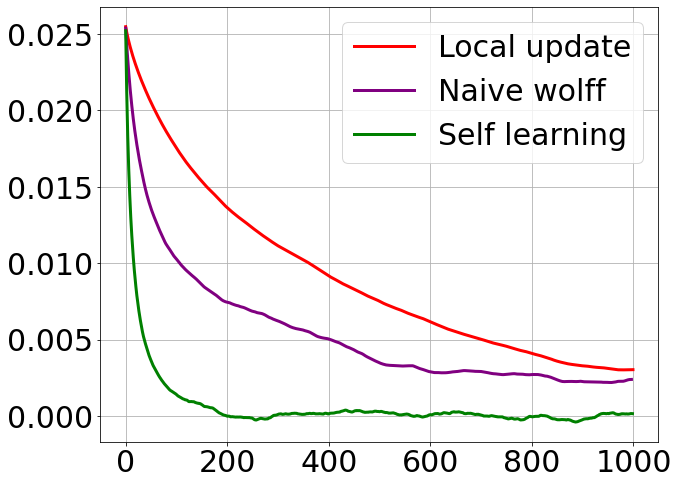

In [320]:
fig = plt.figure(figsize=(10,8))
plt.plot(C_40[:1000], label="Local update",lw=3,  color='red')
plt.plot(C_40_wolff[3:1000], label="Naive wolff", lw=3, color='purple')
plt.plot(C_40_slmc[1:1000], label="Self learning",lw=3, color='green')
plt.grid()
plt.legend(fontsize=30)
plt.tick_params(labelsize = 30)
#plt.xlabel('t [MCS]', fontsize=18)
#plt.ylabel('correlation', fontsize=18)
#plt.suptitle('Correlation_length(T:2.49, L:40)', fontsize=20)
fig.show()

## 学習

In [23]:
data = np.loadtxt('../output/Energy_C1_L40_T5.00_2026.dat')
linear_reg = np.polyfit(data[1:,1], data[1:,0], 1)
func = np.poly1d(linear_reg)
y_pred = func(data[1:,1])

/Users/oritoyusuke/miniforge3/envs/python38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


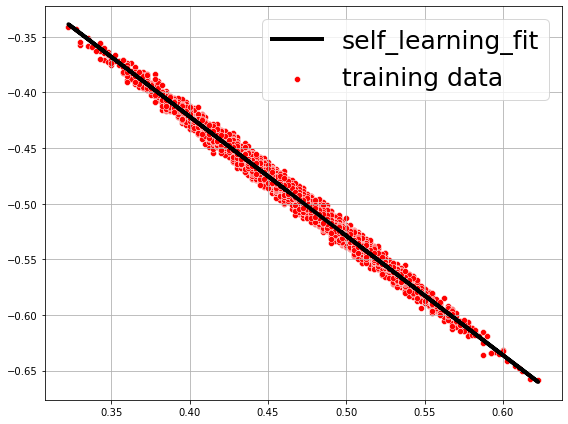

In [27]:
fig, ax = plt.subplots(figsize=(8,6))
l1, l2= "training data", "self_learning_fit"
sns.scatterplot(data[1:,1],data[1:,0],color='red', ax=ax, label=l1)
ax.plot(data[1:,1],y_pred,lw=4, color='black', label=l2)
#ax.set_xlabel("C1/N", fontsize=16)
#ax.set_ylabel("E/N", fontsize=16)
ax.legend(fontsize=25)
ax.grid()
plt.tight_layout()
plt.show()

## システムサイズ依存性

In [192]:
L_list = np.array([10, 20, 40, 60, 80])
L_list_large = [100, 120, 160, 200, 240]
L_list_slmc = [10, 20, 30, 40, 60,70, 80,100,  120, 160, 200, 240]
tau_list = [17, 74, 409, 996, 1873]
tau_list_wolff = [5.34, 32.07, 181.82, 407.55, 829]
tau_list_slmc = [3.02, 6.2,11.07, 20.13, 48.69, 75.07, 166.7, 327.98, 535.59, 1586.1, 2503.11, 4120]
tau_list_restslmc = [254.11, 454.73,849,1113.56,1950 ]

In [188]:
popt_local = [ 2.28516808,  -2.46343013]
popt_wolff=[ 2.41555068,  -3.82151718]
popt_slmc =[1.67411839 , -3.01101709]
popt_restslmc = [ 2.18738948, -4.44642701]

In [183]:
def func2(x, a, b):
    return a*x + b
L_list_slmc = [10, 20,30,50, 60,70, 80,]
tau_list_slmc_ = [ 3.02, 6.2,11.07,30.13,48.69, 75.07,  81.09,  ]
x_data= np.log(L_list_slmc)
y_data = np.log(tau_list_slmc_)
popt, pcov = curve_fit(func2, x_data, y_data)
print(popt)

[ 1.67411839 -3.01101709]


In [182]:
y_data

array([1.10525683, 1.82454929, 2.40423875, 3.40552135, 3.88547367,
       4.31842101, 4.39555965])

In [169]:
def func2(x, a, b):
    return a*(x**b)

L_list_slmc = [10, 20,30,50, 60,70, 80,]
tau_list_slmc_ = [ 3.02, 6.2,11.07,30.13,48.69, 75.07,  81.09,  ]
x_data= L_list_slmc
y_data = tau_list_slmc_
popt, pcov = curve_fit(func2, x_data, y_data)
print(popt)

[0.01592586 1.96125219]


In [180]:
L_list_slmc

[10, 20, 30, 40, 60, 70, 80, 100, 120, 160, 200, 240]

In [10]:
np.exp(-4.44642701)

0.01172036900805498

In [189]:
x = np.arange(10)
x_ = np.arange(4,10)
y  = (popt_local[0]*x)+popt_local[1]
y_wolff  = popt_wolff[1]+(x*popt_wolff[0])
y_slmc = popt_slmc[1]+(x*popt_slmc[0])
y_restslmc = popt_restslmc[1]+(x*popt_restslmc[0])

In [172]:
popt_

[3.02,
 6.2,
 11.07,
 20.13,
 48.69,
 75.07,
 166.7,
 327.98,
 535.59,
 1586.1,
 2503.11,
 4120]

In [241]:
L_list = np.array([10, 20, 40, 60, 80])
L_list_large = [100, 120, 160, 200, 240]
L_list_slmc = [10, 20, 30, 40, 60,70, 80,100,  120, 160, 200, 240]
tau_list = [17, 74, 409, 996, 1873]
tau_list_wolff = [5.34, 32.07, 181.82, 407.55, 829]
tau_list_slmc = [3.02, 6.2,11.07, 20.13, 48.69, 75.07, 166.7, 327.98, 535.59, 1586.1, 2503.11, 4120]
tau_list_restslmc = [254.11, 454.73,849,1113.56,1950 ]

In [255]:
def func2(x, a, b):
    return a*(x**b)


x_data= L_list_large
y_data =  [254.11, 454.73,849,1113.56,1950 ]
popt, pcov = curve_fit(func2, x_data, y_data)
print(popt)

[0.00998583 2.21715493]


In [221]:
x = np.arange(0, 100)
y  = (x**popt_local[0])*popt_local[1]
y_wolff  = popt_wolff[1]+(x*popt_wolff[0])
y_slmc = popt_slmc[1]+(x*popt_slmc[0])
y_restslmc = popt_restslmc[1]+(x*popt_restslmc[0])

/var/folders/nm/f1mftswx2bn4x3l5cmqskq5r0000gn/T/ipykernel_7716/4139912685.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


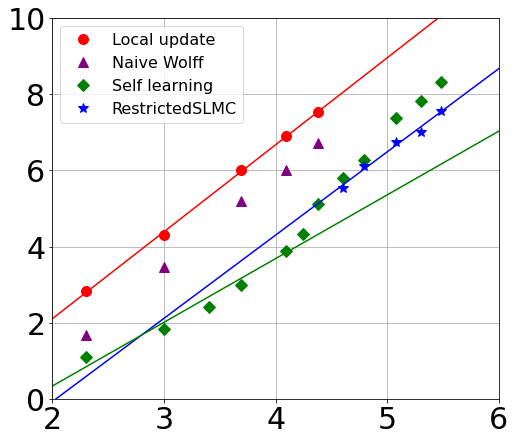

In [217]:
fig = plt.figure(figsize=(8, 7))
plt.plot(np.log(L_list), np.log(tau_list), 'o',markersize=10, color='red', label='Local update' )
plt.plot(np.log(L_list), np.log(tau_list_wolff), '^',markersize=10, color='purple', label='Naive Wolff' )
plt.plot(np.log(L_list_slmc),np.log(tau_list_slmc), 'D',markersize=8, color='green', label='Self learning' )
plt.plot(np.log(L_list_large), np.log(tau_list_restslmc),'*',markersize=10, color='blue', label='RestrictedSLMC' )
plt.plot(x,y,  color='red' )
#plt.plot(x, y_wolff, color='purple')
plt.plot(x, y_restslmc, color='blue')
plt.plot(x, y_slmc, color='green')
#plt.xlabel('L', fontsize=16)
#plt.ylabel('τ', fontsize=16)
#plt.xticks([0,20,40,60,80,100])
#plt.xscale("log")
#plt.yscale("log",basey=2)
plt.xlim(2, 6)
plt.ylim(0,10)
plt.grid()
plt.legend(fontsize=16)
plt.tick_params(labelsize = 30)
fig.show()

In [259]:
x = np.arange(10, 260)
x_ = np.arange(4,10)
y  = (x**2.208)*0.117
#y_wolff  = 0.00998*(x**2.21)
y_slmc =0.015*(x**1.96)
y_restslmc = 0.00998*(x**2.21)

/var/folders/nm/f1mftswx2bn4x3l5cmqskq5r0000gn/T/ipykernel_7716/3328445828.py:14: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale("log",basey=2)
/var/folders/nm/f1mftswx2bn4x3l5cmqskq5r0000gn/T/ipykernel_7716/3328445828.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


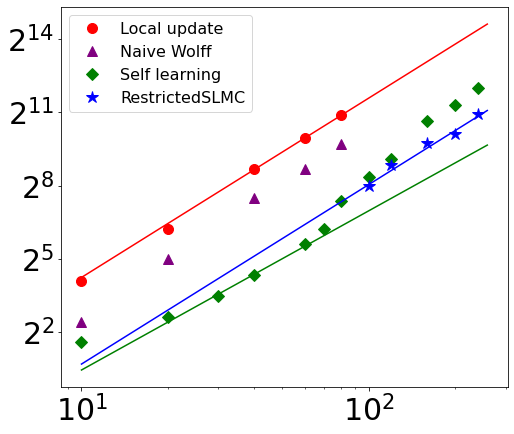

In [260]:
fig = plt.figure(figsize=(8, 7))
plt.plot(L_list, tau_list, 'o',markersize=10, color='red', label='Local update' )
plt.plot(L_list, tau_list_wolff, '^',markersize=10, color='purple', label='Naive Wolff' )
plt.plot(L_list_slmc,tau_list_slmc, 'D',markersize=8, color='green', label='Self learning' )
plt.plot(L_list_large, tau_list_restslmc,'*',markersize=12, color='blue', label='RestrictedSLMC' )
plt.plot(x,y,  color='red' )
#plt.plot(x, y_wolff, color='purple')
plt.plot(x, y_restslmc, color='blue')
plt.plot(x, y_slmc, color='green')
#plt.xlabel('L', fontsize=16)
#plt.ylabel('τ', fontsize=16)
#plt.xticks([0,20,40,60,80,100])
plt.xscale("log")
plt.yscale("log",basey=2)

#plt.xlim(2, 6)
#plt.ylim(0,10)
#plt.grid()
plt.legend(fontsize=16)
plt.tick_params(labelsize = 30)
fig.show()

#### fig = plt.figure(figsize=(8, 5.5))
plt.plot(np.log(L_list), np.log(tau_list), "o",markersize=10, color='red',label='local_update' )
plt.plot(y, color='red',)
plt.plot(np.log(L_list), np.log(tau_list_wolff), "^",markersize=10, color='purple',label='Naive wolff' )
plt.plot(y_wolff, color='purple', )
plt.plot(np.log(L_list_slmc), np.log(tau_list_slmc), 'D',markersize=10, color='green', label='Self learning' )
#plt.plot(y_slmc,  color='green',  )
plt.plot(np.log(L_list_large), np.log(tau_list_restslmc), 'D',markersize=10, color='blue', label='RestrictedSLMC' )
plt.plot(y_restslmc, color='blue')
#plt.xlabel('L', fontsize=16)
#plt.ylabel('τ', fontsize=16)
#plt.xticks([0,20,40,60,80,100])
plt.xlim(2,6)
#plt.ylim(0,2000)
plt.grid()
plt.legend(fontsize=20)
plt.tick_params(labelsize = 30)
fig.show()

In [4]:
def func_local(x, a, b):
    return b*(x**a)

x_data= np.array(L_list)
y_data = np.array(tau_list)
popt, pcov = curve_fit(func_local, x_data, y_data)
print(popt)

# τ_local = 0.117 L^2.208

def func_slmc(x, a, b):
    return a * np.exp(x/b)

y_data_ = np.array(tau_list_wolff)
popt, pcov = curve_fit(func_local, x_data, y_data_)
print(popt)

y_data__ = np.array(tau_list_slmc)
popt, pcov = curve_fit(func_local, x_data, y_data__)
print(popt)
# τ_slmc = 0.117 L^2.208

NameError: name 'L_list' is not defined

In [19]:
L_list_large = [100, 120, 160, 200, 240]
tau_list_restslmc = [254.11, 454.73,849,1113.56,1950 ]

In [42]:
def func_local(x, a, b):
    return b*(x**a)

y_data_ = np.array(tau_list_restslmc)
popt_rest, pcov = curve_fit(func_local, L_list_large, y_data_)
print(popt_rest)

[2.21715498 0.00998583]


In [67]:
popt_local = [2.20821907 ,0.11761498]
popt_rest = [2.21715498, 0.00998583]
y_  = popt_local[1]*(x**popt_local[0])
x = np.arange(100, 300)
y_rest  = popt_rest[1]*(x**popt_rest[0])

NameError: name 'y_' is not defined

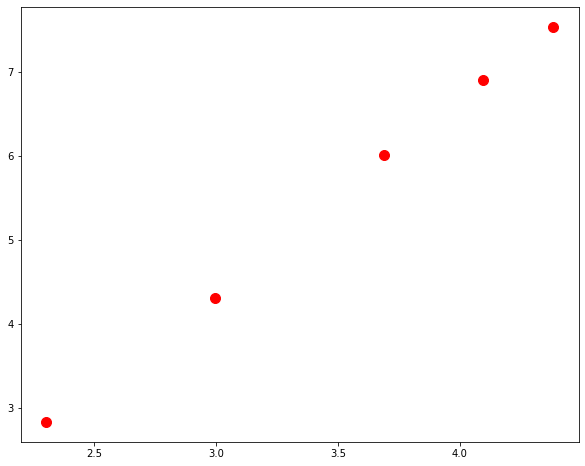

In [93]:
fig = plt.figure(figsize=(10, 8))
plt.plot(np.log(L_list), np.log(tau_list), "o",markersize=10, color='red')
plt.plot(x, y_, color='red', label='local_update' )
plt.plot(np.log(L_list_large), np.log(tau_list_restslmc), 'D',markersize=10, color='blue', label='RestrictedSLMC' )
#plt.plot(x, y_rest,  color='blue', label='RestrictedSLMC' )

#plt.xlabel('L', fontsize=16)
#plt.ylabel('τ', fontsize=16)
#plt.xticks([100,  160, 200, 240, 280])
#plt.xlim(80,300)
#plt.ylim(0,2000)
plt.grid()
plt.legend(fontsize=30)
plt.tick_params(labelsize = 30)
fig.show()

/var/folders/nm/f1mftswx2bn4x3l5cmqskq5r0000gn/T/ipykernel_7716/2263504632.py:4: RuntimeWarning: invalid value encountered in log
  y_data__ = np.log(-1*x_data)


[]

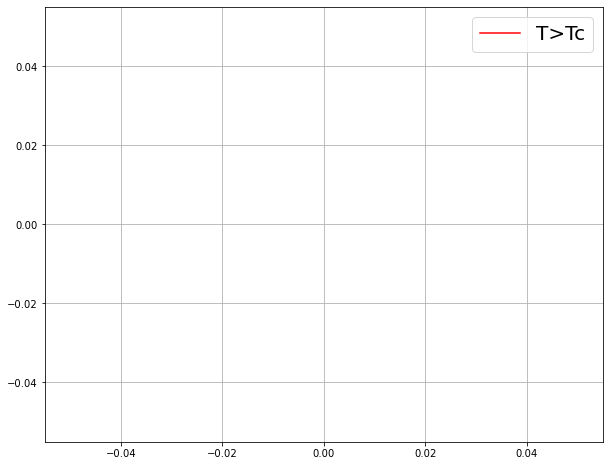

In [92]:
x_data = np.arange(1, 6)
y_data = -1*x_data + 2
y_data_ =-1* np.log(x_data) + 2
y_data__ = np.log(-1*x_data)
y_data
fig = plt.figure(figsize=(10, 8))
#plt.plot(x_data, y_data, color="blue", label='T=Tc')
#plt.plot(x_data, y_data_, color='green', label='T>Tc')
plt.plot(x_data, y_data__, color='red', label='T>Tc')
plt.grid()
plt.legend(fontsize=20)
plt.plot()

In [78]:
y_data

array([  -8,   -9,  -10,  -11,  -12,  -13,  -14,  -15,  -16,  -17,  -18,
        -19,  -20,  -21,  -22,  -23,  -24,  -25,  -26,  -27,  -28,  -29,
        -30,  -31,  -32,  -33,  -34,  -35,  -36,  -37,  -38,  -39,  -40,
        -41,  -42,  -43,  -44,  -45,  -46,  -47,  -48,  -49,  -50,  -51,
        -52,  -53,  -54,  -55,  -56,  -57,  -58,  -59,  -60,  -61,  -62,
        -63,  -64,  -65,  -66,  -67,  -68,  -69,  -70,  -71,  -72,  -73,
        -74,  -75,  -76,  -77,  -78,  -79,  -80,  -81,  -82,  -83,  -84,
        -85,  -86,  -87,  -88,  -89,  -90,  -91,  -92,  -93,  -94,  -95,
        -96,  -97,  -98,  -99, -100, -101, -102, -103, -104, -105, -106,
       -107, -108, -109, -110, -111, -112, -113, -114, -115, -116, -117,
       -118, -119, -120, -121, -122, -123, -124, -125, -126, -127, -128,
       -129, -130, -131, -132, -133, -134, -135, -136, -137, -138, -139,
       -140, -141, -142, -143, -144, -145, -146, -147, -148, -149, -150,
       -151, -152, -153, -154, -155, -156, -157, -1

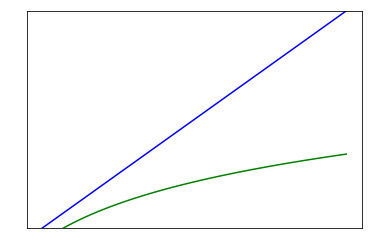

In [327]:
fig = plt.figure()
x = np.linspace(1,5, 100)
y = x
plt.plot(x, y, color='blue')
#plt.plot(x, 2**x-1, color='red')
#plt.plot(x, np.log(x*4))
plt.plot(x, np.log(x*1.5)+0.35, color='green')
plt.ylim(1,5)
plt.xticks(color="None")
plt.yticks(color="None")
plt.tick_params(length=0)